In [1]:
# First, compute the camera calibration matrix and distortion coefficients given a set of chessboard images 
# (in the camera_cal folder in the repository).

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
nx = 9
ny = 6

In [4]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

In [5]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
len(images)

20

In [6]:
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    print(fname)
    st = datetime.now()
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        write_name = 'camera_cal/corners_found/'+str(idx)+'.jpg'
        cv2.imwrite(write_name, img)
    print('runtime: {}'.format(datetime.now()-st))        

camera_cal/calibration1.jpg
runtime: 0:00:00.231540
camera_cal/calibration10.jpg
runtime: 0:00:00.316866
camera_cal/calibration11.jpg
runtime: 0:00:00.454023
camera_cal/calibration12.jpg
runtime: 0:00:00.222508
camera_cal/calibration13.jpg
runtime: 0:00:00.236921
camera_cal/calibration14.jpg
runtime: 0:00:00.230391
camera_cal/calibration15.jpg
runtime: 0:00:00.248232
camera_cal/calibration16.jpg
runtime: 0:00:00.209895
camera_cal/calibration17.jpg
runtime: 0:00:00.168720
camera_cal/calibration18.jpg
runtime: 0:00:00.169642
camera_cal/calibration19.jpg
runtime: 0:00:00.259126
camera_cal/calibration2.jpg
runtime: 0:00:00.060168
camera_cal/calibration20.jpg
runtime: 0:00:00.405637
camera_cal/calibration3.jpg
runtime: 0:00:00.062011
camera_cal/calibration4.jpg
runtime: 0:00:00.324026
camera_cal/calibration5.jpg
runtime: 0:00:00.262321
camera_cal/calibration6.jpg
runtime: 0:00:00.336075
camera_cal/calibration7.jpg
runtime: 0:00:00.249543
camera_cal/calibration8.jpg
runtime: 0:00:00.256675
c

In [7]:
import pickle
%matplotlib inline

In [8]:
# Test undistortion on an image
testfname = 'camera_cal/calibration3.jpg'
img = cv2.imread(testfname)
img_size = (img.shape[1], img.shape[0])
img_size

(1280, 720)

In [9]:
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [10]:
ret, mtx

(1.1868973603423718,
 array([[  1.15396093e+03,   0.00000000e+00,   6.69705357e+02],
        [  0.00000000e+00,   1.14802496e+03,   3.85656234e+02],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]]))

In [11]:
# k1, k2, p1, p2, k3. 
# k for radial distortion (curved lenses), p for tangential distortion (image plane not alingned with lens)
dist

array([[ -2.41017956e-01,  -5.30721173e-02,  -1.15810355e-03,
         -1.28318856e-04,   2.67125290e-02]])

In [12]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('camera_cal/test_undist.jpg',dst)

True

In [13]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_pickle.p", "wb" ) )

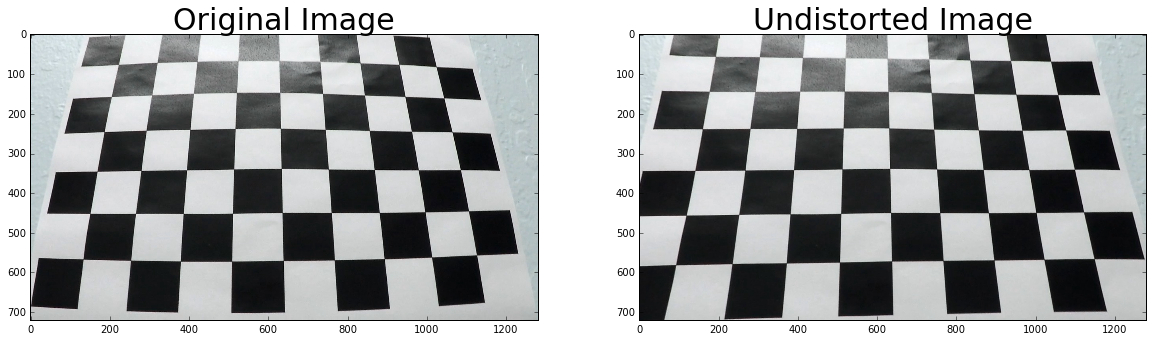

In [14]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(img);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(dst);
ax2.set_title('Undistorted Image', fontsize=30);

In [15]:
import matplotlib.image as mpimg

In [16]:
#Next, for a series of test images (in the test_images folder in the repository):
#
#Apply the distortion correction to the raw image.
#Use color transforms, gradients, etc., to create a thresholded binary image.
#Apply a perspective transform to rectify binary image ("birds-eye view").
#Detect lane pixels and fit to find lane boundary.
#Determine curvature of the lane and vehicle position with respect to center.
#Warp the detected lane boundaries back onto the original image.
#Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


In [17]:
image = mpimg.imread('test_images/test2.jpg')
image.shape

(720, 1280, 3)

In [18]:
#Apply the distortion correction to the raw image.
# inputs:
#   img  -- input image
#   mtx  -- camera matrix from calibrateCamera
#   dist -- distortion coefficients from calibrateCamera
def undistort(img, mtx, dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

In [19]:
undist = undistort(image, mtx, dist)
#cv2.imwrite('test_images/test5_undist.jpg',undist)
undist.shape

(720, 1280, 3)

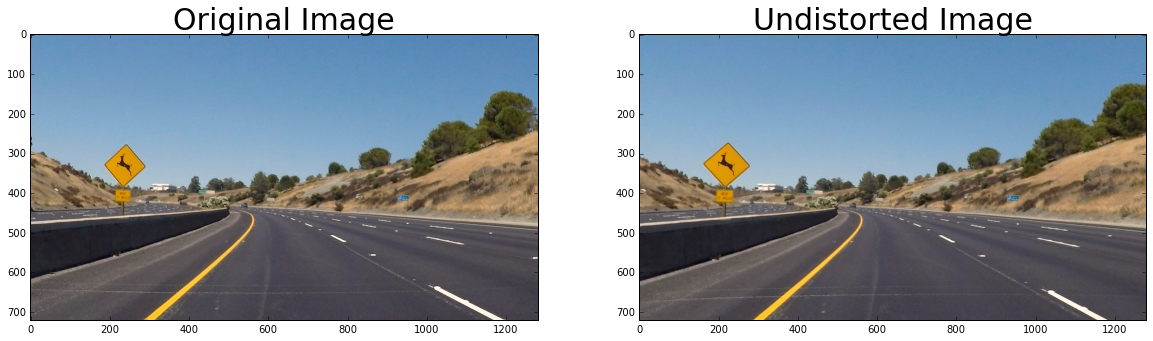

In [20]:
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(image);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(undist);
ax2.set_title('Undistorted Image', fontsize=30);

In [21]:
image = undist

In [22]:
# Apply Sobel along x or y axis to img.
# Then takes an absolute value and apply thresholds.
# Returns binary image.
#   inputs
#     img          -- input image
#     orient       -- 'x' or 'y'
#     kernel_size  -- sobel operator kernel size, in px
#     thresholds   -- two values for low and high thresholds
def sobel_abs_thresholds(img, orient='x', kernel_size=3, thresholds=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    else:
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresholds[0]) & (scaled_sobel <= thresholds[1])] = 1
    return binary_output

In [23]:
# Applies Sobel along x and y.
# Computes the magnitude of the gradient and applies thresholds.
# Returns binary image.
#   inputs
#     img          -- input image
#     kernel_size  -- sobel operator kernel size, in px
#     thresholds   -- two values for low and high thresholds
def sobel_magnitude_thresholds(img, kernel_size=3, thresholds=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    abs_sobel = np.sqrt(sobelx**2 + sobely**2)
    scaled_sobel = np.uint8(255*abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresholds[0]) & (scaled_sobel <= thresholds[1])] = 1
    return binary_output

In [24]:
# Applies Sobel along x and y, then computes the direction of the gradient for absolute sobel values.
# Applies thresholds.
# Returns binary image.
#   inputs
#     img          -- input image
#     kernel_size  -- sobel operator kernel size, in px
#     thresholds   -- two values for low and high thresholds
def sobel_graddir_thresholds(img, kernel_size=3, thresholds=(0., np.pi/2)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    sobel_grad = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output = np.zeros_like(sobel_grad).astype(np.uint8)
    binary_output[(sobel_grad >= thresholds[0]) & (sobel_grad <= thresholds[1])] = 1
    return binary_output

In [25]:
# Converts image to HLS color space.
# Applies thresholds to the S-channel.
# Returns binary image.
#   inputs
#     img          -- input image
#     thresholds   -- two values for low and high thresholds
def hls_s_thresholds(img, thresholds=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS) 
    s = hls[:,:,2]
    binary_output = np.zeros_like(s)
    binary_output[(s >= thresholds[0]) & (s <= thresholds[1])] = 1
    return binary_output

In [26]:
def thresholded_binary(image):
    # sobel x
    sx_kernel = 3
    sx_thresh = (20, 100)
    sx_binary = sobel_abs_thresholds(image, orient='x', kernel_size=sx_kernel, thresholds=sx_thresh)
    # sobel y
    sy_kernel = 3
    sy_thresh = (30, 100)
    sy_binary = sobel_abs_thresholds(image, orient='y', kernel_size=sy_kernel, thresholds=sy_thresh)
    # sobel magnitude
    smag_kernel = 5
    smag_thresh = (30,100)
    smag_binary = sobel_magnitude_thresholds(image, kernel_size=smag_kernel, thresholds=smag_thresh)
    # sobel gradient direction
    sgraddir_kernel = 7
    sgraddir_thresh = (0.7, 1.3)
    sgraddir_binary = sobel_graddir_thresholds(image, kernel_size=sgraddir_kernel, thresholds=sgraddir_thresh)
    # HSV's S threshold
    s_thresh = (170,255)
    s_binary = hls_s_thresholds(image, thresholds=s_thresh)
    # x gradient and S threshold
    combined = np.zeros_like(sx_binary)
    combined[(s_binary == 1) | (sx_binary == 1)] = 1
    # x gradient and magnitude
    combined0 = np.zeros_like(sx_binary)
    combined0[(sx_binary == 1) & (smag_binary == 1)] = 1   
    # y gradient and grad direction
    combined3 = np.zeros_like(sy_binary)
    combined3[(sy_binary == 1) & (sgraddir_binary == 1)] = 1    
    # use previous combined, but add pixels where gradient magnitude and direction are activated
    combined2 = np.copy(combined)
    combined2[((smag_binary == 1) & (sgraddir_binary == 1))] = 1
    # combined2 OR combined3
    combined4 = np.copy(combined2)
    combined4[combined3 == 1] = 1
    # combined4 OR combined0
    combined5 = np.copy(combined4)
    combined5[combined0 == 1] = 1
    return combined5

In [27]:
thresholded_binary_image = thresholded_binary(image)

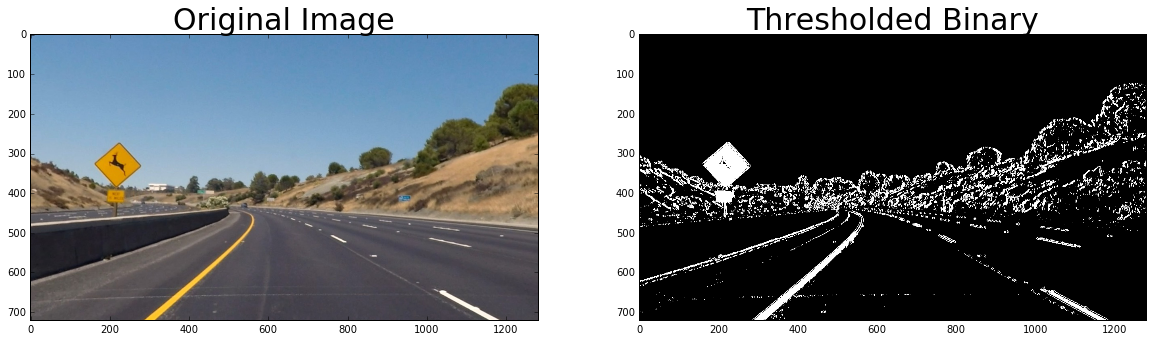

In [28]:
# Visualize combined
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(image);
ax1.set_title('Original Image', fontsize=30);
ax2.imshow(thresholded_binary_image, cmap='gray');
ax2.set_title('Thresholded Binary', fontsize=30);

In [29]:
# Apply a perspective transform to rectify binary image ("birds-eye view").

In [143]:
copy = np.copy(thresholded_binary_image)
color_copy = np.dstack((copy, copy, copy))
src = np.float32([[85,670], 
                  [515,480], 
                  [765,480], 
                  [1195,670]])
pts = np.array(src)
cv2.fillPoly(color_copy, np.int_([pts]), (0,255,0));
result = cv2.addWeighted(image, 1, color_copy, 0.3, 0)

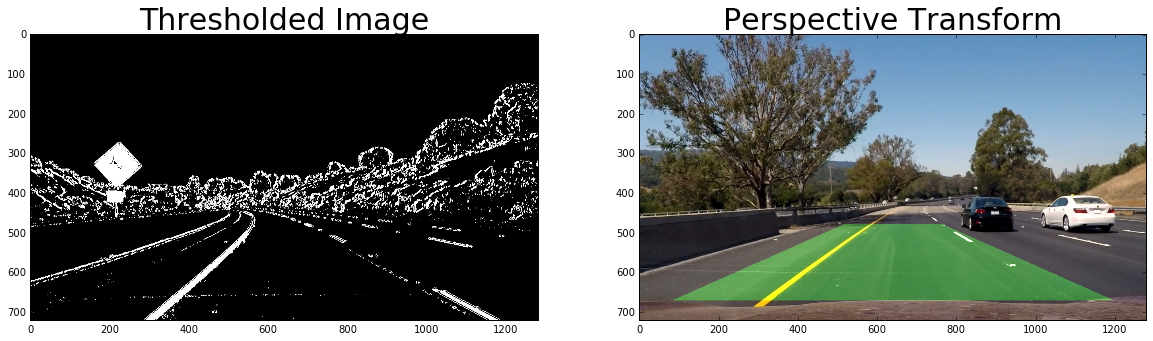

In [144]:
# Visualize transform area
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(copy, cmap='gray');
ax1.set_title('Thresholded Image', fontsize=30);
ax2.imshow(result);
ax2.set_title('Perspective Transform', fontsize=30);

In [145]:
# Does perspective transform for the part of the road between lanes.
# Takes undistorted image
# Returns transfromed image, the matrix used to transform it and the matrix for inverse transform
def perspective_transform(img, M=None, Minv=None):
    imshape = img.shape
    
    if (M is None):
        src = np.float32([[85,670], 
                          [515,480], 
                          [765,480], 
                          [1195,670]])
        dst = np.float32([[imshape[1]*.05, imshape[0]*.95],
                          [imshape[1]*.05, imshape[0]*.05],
                          [imshape[1]*.95, imshape[0]*.05],
                          [imshape[1]*.95, imshape[0]*.95]])
        M = cv2.getPerspectiveTransform(src, dst)
        Minv = cv2.getPerspectiveTransform(dst, src)

    warped = cv2.warpPerspective(img, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
    return warped, M, Minv

In [164]:
# Does perspective transform for the part of the road between lanes.
# Takes undistorted image
# Returns transfromed image, the matrix used to transform it and the matrix for inverse transform
def perspective_transform(img, M=None, Minv=None):
    imshape = img.shape
    
    if (M is None):
        src = np.float32([[85,670], 
                          [515,480], 
                          [765,480], 
                          [1195,670]])
        dst = np.float32([[imshape[1]*.0, imshape[0]*1.],
                          [imshape[1]*.0, imshape[0]*.0],
                          [imshape[1]*1., imshape[0]*.0],
                          [imshape[1]*1., imshape[0]*1.]])
        M = cv2.getPerspectiveTransform(src, dst)
        Minv = cv2.getPerspectiveTransform(dst, src)

    warped = cv2.warpPerspective(img, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
    return warped, M, Minv

In [165]:
top_down_binary, M, Minv = perspective_transform(thresholded_binary_image, None, None)

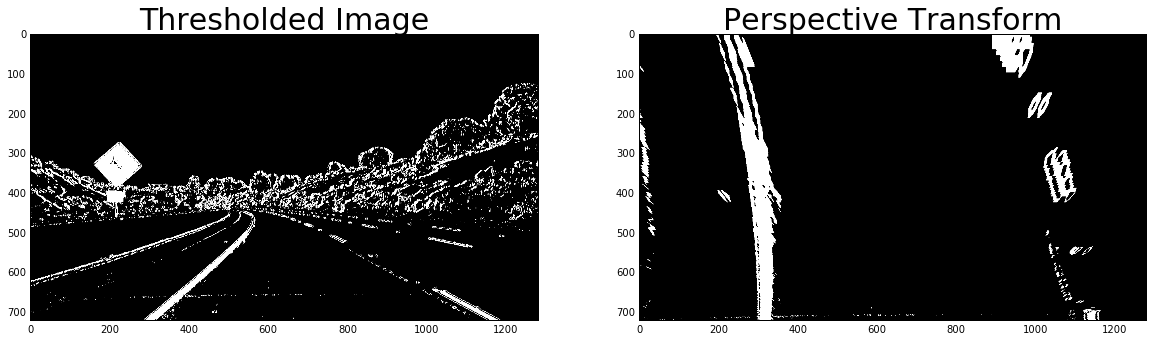

In [166]:
# Visualize
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10));
ax1.imshow(thresholded_binary_image, cmap='gray');
ax1.set_title('Thresholded Image', fontsize=30);
ax2.imshow(top_down_binary, cmap='gray');
ax2.set_title('Perspective Transform', fontsize=30);

In [167]:
#Detect lane pixels and fit to find lane boundary.

In [184]:
# Define a class to receive the characteristics of each line detection
class Line():
    # class constants that are same for all instances
    
    # pct width of total image that one lane can occupy. used to decide on histograms
    _pct_image_width_lane_width_max=0.1
    # for the sliding window method -- height of the sliding window
    _pct_image_height_slice=0.1
    # Define conversions in x and y from pixels space to meters. depends on the end of pipeline 'top-down' image
    #ym_per_pix = 30/720 # meters per pixel in y dimension
    _ym_per_pix = 3/130 # meters per pixel in y dimension. based on dashed line=3m
    #xm_per_pix = 3.7/700 # meteres per pixel in x dimension
    _xm_per_pix = 3.7/840 # meteres per pixel in x dimension
    # history length for confirming detection
    _n = 5
    
    
    def __init__(self):
        # was the line detected in the last iteration?
        self._detected = False
        # number of last recent failed fits
        self._failed_fits = 0
        # x values of the last n fits of the line
        self._recent_xfitted = []
        #average x values of the fitted line over the last n iterations
        self._bestx = None
        #polynomial coefficients averaged over the last n iterations
        self._best_fit = None
        #polynomial coefficients for the most recent fit in px coordinates
        self._current_fit_px = [np.array([False])]  
        #polynomial coefficients for the most recent fit in m coordinates
        self._current_fit_m = [np.array([False])]  
        #radius of curvature of the line in pixels
        self._radius_of_curvature = None 
        #radius of curvature of the line in meters
        self._radius_of_curvature_m = None 
        #distance in px of vehicle center from the line
        self._line_pos_px = None 
        #distance in m of vehicle center from the line
        self._line_pos_m = None 
        #difference in fit coefficients between last and new fits
        self._diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line image pixels
        self._img_allx = None  
        #y values for detected line image pixels
        self._img_ally = None
        #x values for detected sliding window pixels
        self._histogram_allx = None  
        #y values for detected sliding pixels
        self._histogram_ally = None
        #x values for fitted pixels
        self._line_allx = None  
        #y values for fitted pixels
        self._line_ally = None
        
    # find radius of curvature closest to the bottom of the image
    def calc_radius_of_curvature(self):
        # curvature in pixels
        a = self._current_fit_px[0]
        b = self._current_fit_px[1]
        c = self._current_fit_px[2]
        y_eval = np.max(self._line_ally)
        self._radius_of_curvature = (1.0+(2.0*a*y_eval+b)**2)**1.5 / np.abs(2*a)
        # curvature in meters
        self._current_fit_m = np.polyfit(self._line_ally*self._ym_per_pix, self._line_allx*self._xm_per_pix, 2)
        a = self._current_fit_m[0]
        b = self._current_fit_m[1]
        c = self._current_fit_m[2]
        self._radius_of_curvature_m = ((1.0 + (2.0*a*y_eval + b)**2)**1.5) / np.abs(2*a)

        
    # given binary top-down view of lane pixels find possible left and right x values, in pixels
    # using histogram method
    # Used as static method. Does not change Line state.
    #    inputs:
    #       image                           -- binary image with top-down (perspective-transformed) view of lane lines. 
    #                                       -- assume x and y coordinates are reversed
    #    outputs:
    #        left_lane_x_px                 -- initial estimate for left lane x coordinate or None
    #        right_lane_x_px                -- initial estimate for right lane x coordinate or None
    def find_left_right_x(self, image):
        histogram1 = np.sum(image, axis=0)
        width = len(histogram1)
        # find the most prominent peak in the histogram
        imax1 = np.argmax(histogram1)
        max1 = histogram1[imax1]
        # remove the peak and pct_image_width_lane_width_max elements around it.
        histogram2 = np.copy(histogram1)
        nx = width*self._pct_image_width_lane_width_max
        histogram2[imax1-int(nx/2.0) : imax1+int(nx/2.0)] = 0
        # find second highest peak
        imax2 = np.argmax(histogram2)
        max2 = histogram2[imax2]
        # remove the second peak and pct_image_width_lane_width_max elements around it.
        histogram3 = np.copy(histogram2)
        histogram3[imax2-int(nx/2.0) : imax2+int(nx/2.0)] = 0
        # find third highest peak
        imax3 = np.argmax(histogram3)
        max3 = histogram3[imax3]

        l = min(imax1, imax2)
        r = max(imax1, imax2)

        # decide what kind of situation we have
        if max1/max3<1.5:
            # inconsequential difference between topmost peak and the 'background'
            return None, None
        if max2/max3<1.5:
            # inconsequential difference between second peak and the 'background'
            return None if imax2==l else l, None if imax2==r else r
        return l, r

    # use sliding window to find the potential lane pixels.
    # then fit second order polynomial to represent the line
    #    inputs:
    #       image                           -- binary image with top-down (perspective-transformed) view of lane lines. 
    #                                       -- assume x and y coordinates are reversed
    #       initial_x                       -- x from which to start finding the line
    def fit_from_x_on_image(self, image, initial_x):
        (height, width) = image.shape # in the image operations x and y will be reversed
        # sliding window points
        nx = int(width*self._pct_image_width_lane_width_max)
        ny = int(height*self._pct_image_height_slice)
        y_points = np.arange(ny,height+1,ny)
        x_points = np.zeros_like(y_points)
        x_points[-1] = initial_x
        imgcopy = np.zeros_like(image)
        # sliding window loop
        failed_window_points = 0
        for i in range(len(y_points)-1,0,-1):
            slice_y_bottom = y_points[i]
            slice_y_top = slice_y_bottom - ny
            slice_x_bottom = x_points[i]
            imgslice = image[slice_y_top:slice_y_bottom,:]
            ones = np.zeros_like(imgslice)
            ones[:,slice_x_bottom-int(nx/2):slice_x_bottom+int(nx/2)] = 1
            imgslice2 = np.bitwise_and(imgslice, ones)
            imgcopy[slice_y_top:slice_y_bottom,:] = imgslice2
            (y,x) = np.nonzero(imgslice2) # x and y are here in the 'opposite' order
            if (len(set(y))>int(ny*.30)):
                # looks like 'vertical' line segment
                slice_x_top = np.mean(x)
            else:
                failed_window_points += 1
                if self._detected:
                    # if we fitted line successfully previously, use last fit for best estimate of top x in window
                    slice_x_top = np.polyval(self._current_fit_px, slice_y_top)
                else:
                    slice_x_top = slice_x_bottom
            x_points[i-1] = slice_x_top
        # fit polymonial to x,y from sliding window loop
        last = self._current_fit_px
        self._current_fit_px = np.polyfit(y_points, x_points, 2)
        self._diff = self._current_fit_px - last
        self._line_ally = np.array(range(0,height))
        self._line_allx = np.polyval(self._current_fit_px, self._line_ally)
        # estimate confidence
        if (failed_window_points > len(y_points)*0.50):
            self._failed_fits += 1
        else:
            self._failed_fits = 0
        # save/calculate additional data
        self._img_ally, self._img_allx = np.nonzero(imgcopy)
        self.calc_radius_of_curvature()
        self._line_pos_px = -(int(width/2) - self._line_allx[-1]) #distance in px of the line vs vehicle center
        self._line_pos_m = self._line_pos_px * self._xm_per_pix   #distance in m of the line vs vehicle center 
        self._histogram_allx = x_points # remember sliding window points
        self._histogram_ally = y_points
        # draw extra annotations on temp result
        imgcopy = cv2.cvtColor(imgcopy*255, cv2.COLOR_GRAY2BGR)
        # plot points estimated from sliding histogram window
        for p in zip(self._histogram_allx, self._histogram_ally):
            cv2.circle(imgcopy, p, radius=6, color=(255,0,0), thickness=-1)
        # plot fitted lines
        cv2.polylines(imgcopy, 
                      np.int32([np.dstack([self._line_allx, self._line_ally])[0]]), 
                      isClosed=0, 
                      color=(0,0,255), thickness=3)

        self._recent_xfitted.append(self._line_allx[-1]) # bottom x from the fitted line
        if len(self._recent_xfitted)>self._n:
            self._recent_xfitted.pop(0)
        self._bestx = np.mean(self._recent_xfitted) # average bottom x from last few fits
        # average coefficients of the fit over last few fits
        i = len(self._recent_xfitted)
        if i==1:
            self._best_fit = np.zeros_like(self._current_fit_px)
        self._best_fit = (self._best_fit*(i-1) + self._current_fit_px) / float(i)
        if i==self._n:
            self._detected = True

        return imgcopy

In [185]:
(height, width) = top_down_binary.shape
# only use bottom half of the image for initial x detection
# build histogram of lower half of the image, closer to the car -- lines should be more straight
lx, rx = Line().find_left_right_x(top_down_binary[int(height/2):,:])
lline = Line()
rline = Line()

In [186]:
lx, rx

(306, None)

In [262]:
# class to combine the lane detection pipeline and keep track of both lines and produce output images
class LaneDetector:
        
    # takes distortion matrix and coefficients calibrated for the camera
    def __init__(self, mtx, dist):
        # undistortion matrix and coefficients
        self._mtx = np.copy(mtx)
        self._dist = np.copy(dist)
        # objects to track left and right lines
        self._lline = Line()
        self._rline = Line()
        # original image
        self._original_image = None
        # un-distorted image
        self._undistorted_image = None
        # thresholded binary combining different edge/contrast detection techniques
        self._thresholded_binary_image = None
        # road in front, perspective-transformed
        self._top_down_binary_image = None
        # perspective transform matrix and inverse
        self._M, self._Minv = None, None
        # binary image of road ahead with annotated fitted lines
        self._top_down_binary_with_lines_image = None
        # original undistorted image annotated with fitted lines
        self._original_annotated_image = None
        # image counter
        self._image_number = 0
        
    # put text on top-down binary view
    def annotate_top_down_binary(self):
        font = cv2.FONT_HERSHEY_SIMPLEX
        # curvature
        if self._lline._detected:
            lc = '{:,.2f}'.format(self._lline._radius_of_curvature)
        else:
            lc = 'NAN'
        if self._rline._detected:
            rc = '{:,.2f}'.format(self._rline._radius_of_curvature)
        else:
            rc = 'NAN'
        s = 'curvature: Left {} px, Right {} px'.format(lc, rc)
        cv2.putText(self._top_down_binary_with_lines_image, s, (350,100), font, fontScale=0.7, color=(0,255,0))
        # line distance from car center
        if self._lline._detected:
            ld = '{:,.2f}'.format(self._lline._line_pos_px)
        else:
            ld = 'NAN'
        if self._rline._detected:
            rd = '{:,.2f}'.format(self._rline._line_pos_px)
        else:
            rd = 'NAN'
        s2 = 'lane dist from center: Left {} px, Right {} px'.format(ld, rd)
        cv2.putText(self._top_down_binary_with_lines_image, s2, (350,150), font, fontScale=0.7, color=(0,255,0))

    # apply the lines and info text to the original undistorted image
    def annotate_undistorted_image(self):
        _color_warp = np.zeros_like(self._original_image)
        # draw area if both line detected
        if self._lline._detected and self._rline._detected:
            # Recast the x and y points into usable format for cv2.fillPoly()
            _pts_left = np.array([np.transpose(np.vstack([self._lline._line_allx, self._lline._line_ally]))])
            _pts_right = np.array([np.flipud(np.transpose(np.vstack([self._rline._line_allx, self._rline._line_ally])))])
            _pts = np.hstack((_pts_left, _pts_right))
            # Draw the lane onto the warped blank image
            cv2.fillPoly(_color_warp, np.int_([_pts]), (0,255, 0))
        # draw left line if detected
        if (self._lline._detected):
            if (self._lline._failed_fits > 0):
                color = (255,0,0)
            else:
                color = (0,0,255)
            cv2.polylines(_color_warp, 
                          np.int32([np.dstack([self._lline._line_allx, self._lline._line_ally])[0]]), 
                          isClosed=0, 
                          color=color, thickness=60)
        # draw right line if detected
        if (self._rline._detected):
            if (self._rline._failed_fits > 0):
                color = (255,0,0)
            else:
                color = (0,0,255)
            cv2.polylines(_color_warp, 
                          np.int32([np.dstack([self._rline._line_allx, self._rline._line_ally])[0]]), 
                          isClosed=0, 
                          color=color, thickness=60)
        
        # Warp the blank back to original image space using inverse perspective matrix (Minv)
        _newwarp = cv2.warpPerspective(_color_warp, self._Minv, (width,height)) 
        # Combine the result with the original image
        self._original_annotated_image = cv2.addWeighted(self._undistorted_image, 1, _newwarp, 0.3, 0)
        
        # add text details
        _overlay = np.zeros_like(self._original_image)
        cv2.rectangle(_overlay, (250,60), (1100,200), (255,255,255), -1)
        self._original_annotated_image = cv2.addWeighted(self._original_annotated_image, 1, _overlay, 0.8, 0)
        font = cv2.FONT_HERSHEY_TRIPLEX
        
        # curvature
        if self._lline._detected:
            if abs(self._lline._radius_of_curvature_m) < 10000:
                lc = '{:,.0f}m'.format(self._lline._radius_of_curvature_m)
            else:
                lc = 'STRAIGHT'
        else:
            lc = 'NAN'
        if self._rline._detected:
            if abs(self._rline._radius_of_curvature_m) < 10000:
                rc = '{:,.0f}m'.format(self._rline._radius_of_curvature_m)
            else:
                rc = 'STRAIGHT'
        else:
            rc = 'NAN'
        s = 'curvature: Left {}, Right {}'.format(lc, rc)
        cv2.putText(self._original_annotated_image, s, (300,100), 
                    font, fontScale=0.7, color=(0,0,0), lineType=cv2.LINE_AA)
        
        # line distance from car center
        if self._lline._detected:
            ld = '{:,.2f}m'.format(self._lline._line_pos_m)
        else:
            ld = 'NAN'
        if self._rline._detected:
            rd = '{:,.2f}m'.format(self._rline._line_pos_m)
        else:
            rd = 'NAN'
        s2 = 'lane distance from car center: Left {}, Right {}'.format(ld, rd)
        cv2.putText(self._original_annotated_image, s2, (300,130), 
                    font, fontScale=0.7, color=(0,0,0), lineType=cv2.LINE_AA)

        if self._lline._detected and self._rline._detected:
            s3 = 'car off center by: {:,.2f}m'.format(self._lline._line_pos_m+self._rline._line_pos_m)
        else:
            s3 = 'car off center by: UNDEFINED'
        cv2.putText(self._original_annotated_image, s3, (300,160), 
                    font, fontScale=0.7, color=(0,0,0), lineType=cv2.LINE_AA)
        
    def create_diagnostic_view(self):
        (height, width, _) = self._original_image.shape
        self._diagnostic_view = np.zeros((height*2, width, 3), dtype=np.uint8)
        self._diagnostic_view[0:height, 0:width] = self._original_annotated_image
        rh = int(height/2)
        rw = int(width/2)
        # distorted original image
        self._diagnostic_view[height:(height+rh), 0:(rw)] = cv2.resize(self._original_image, (rw,rh), interpolation=cv2.INTER_AREA) 
        # thresholded binary
        img = cv2.cvtColor(self._thresholded_binary_image*255, cv2.COLOR_GRAY2BGR)
        self._diagnostic_view[height:(height+rh), rw:(2*rw)] = cv2.resize(img, (rw,rh), interpolation=cv2.INTER_AREA) 
        # perspective-transformed binary
        img = cv2.cvtColor(self._top_down_binary_image*255, cv2.COLOR_GRAY2BGR)
        self._diagnostic_view[(height+rh):(height+2*rh), 0:(rw)] = cv2.resize(img, (rw,rh), interpolation=cv2.INTER_AREA) 
        # annotated binary
        self._diagnostic_view[(height+rh):(height+2*rh), rw:(2*rw)] = cv2.resize(self._top_down_binary_with_lines_image, (rw,rh), interpolation=cv2.INTER_AREA) 
        
        
    def process_image(self, image, initial_images_number=1, return_diagnostic_views=True):
        self._original_image = np.copy(image)
        self._image_number += 1
        (height, width, _) = self._original_image.shape
        # un-distort image
        self._undistorted_image = undistort(self._original_image, self._mtx, self._dist)
        # produce thresholded binary
        self._thresholded_binary_image = thresholded_binary(self._undistorted_image)
        # perspective transform of the road in front
        self._top_down_binary_image, self._M, self._Minv = perspective_transform(self._thresholded_binary_image, 
                                                                                 self._M, self._Minv)
        # initial detection or detection after unsuccessful fits in preceding frames
        lx, rx = None, None
        if (self._image_number < initial_images_number or not self._lline._detected  or not self._rline._detected
                                    or self._lline._failed_fits>0 or self._rline._failed_fits>0):
            # only use bottom half of the image for initial x detection
            # build histogram of lower half of the image, closer to the car -- lines should be more straight
            lx, rx = Line().find_left_right_x(self._top_down_binary_image[int(height/2):,:])
        if lx is None and self._lline._detected:
            lx = self._lline._bestx
        if rx is None and self._rline._detected:
            rx = self._rline._bestx
            
        # fit the lines
        if lx is not None:
            l_imgcopy = self._lline.fit_from_x_on_image(self._top_down_binary_image, lx)
        if rx is not None:
            r_imgcopy = self._rline.fit_from_x_on_image(self._top_down_binary_image, rx)

        # combine both lines info in the top-down image
        if self._lline._detected and self._rline._detected:
            self._top_down_binary_with_lines_image = np.bitwise_or(l_imgcopy, r_imgcopy)
        elif not self._lline._detected and self._rline._detected:
            self._top_down_binary_with_lines_image = r_imgcopy
        elif self._lline._detected and not self._rline._detected:
            self._top_down_binary_with_lines_image = l_imgcopy
        else:
            self._top_down_binary_with_lines_image = cv2.cvtColor(self._top_down_binary_image*255, cv2.COLOR_GRAY2BGR)
        
        self.annotate_top_down_binary()

        self.annotate_undistorted_image()
                
        if (not return_diagnostic_views):
            return self._original_annotated_image
        else:
            self.create_diagnostic_view()
            return self._diagnostic_view

In [263]:
with open("calibration_pickle.p", mode='rb') as f:
    dist_pickle = pickle.load(f)
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])

In [264]:
image = mpimg.imread('test_images/test2.jpg')
import cProfile
cProfile.run('detector.process_image(image)','profstat')
import pstats
p = pstats.Stats('profstat')
p.sort_stats('cumulative').print_stats(20);

Sat Jan 21 23:31:32 2017    profstat

         546 function calls in 0.192 seconds

   Ordered by: cumulative time
   List reduced from 89 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.192    0.192 {built-in method builtins.exec}
        1    0.000    0.000    0.192    0.192 <string>:1(<module>)
        1    0.004    0.004    0.192    0.192 <ipython-input-262-c950da8f84f7>:155(process_image)
        1    0.014    0.014    0.122    0.122 <ipython-input-26-913360a0bace>:1(thresholded_binary)
        1    0.032    0.032    0.046    0.046 <ipython-input-24-6ffd6b89791b>:8(sobel_graddir_thresholds)
        2    0.022    0.011    0.032    0.016 <ipython-input-22-e414b899e737>:9(sobel_abs_thresholds)
        1    0.000    0.000    0.030    0.030 <ipython-input-18-82a3cbb0df97>:6(undistort)
        1    0.030    0.030    0.030    0.030 {undistort}
        6    0.028    0.005    0.028    0.005 {Sobel}
    

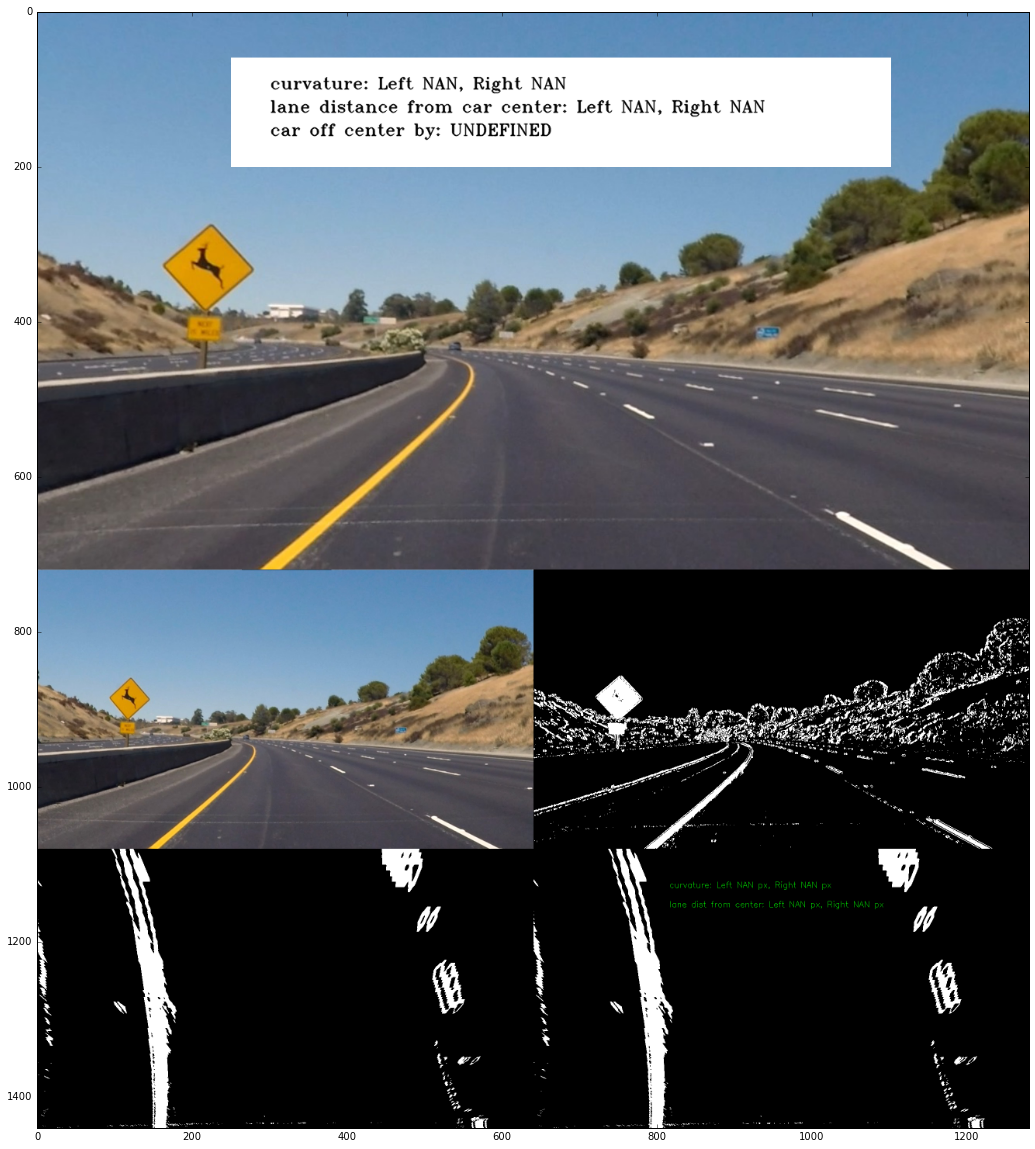

In [265]:
plt.figure(figsize=(20,20))
plt.imshow(detector._diagnostic_view);

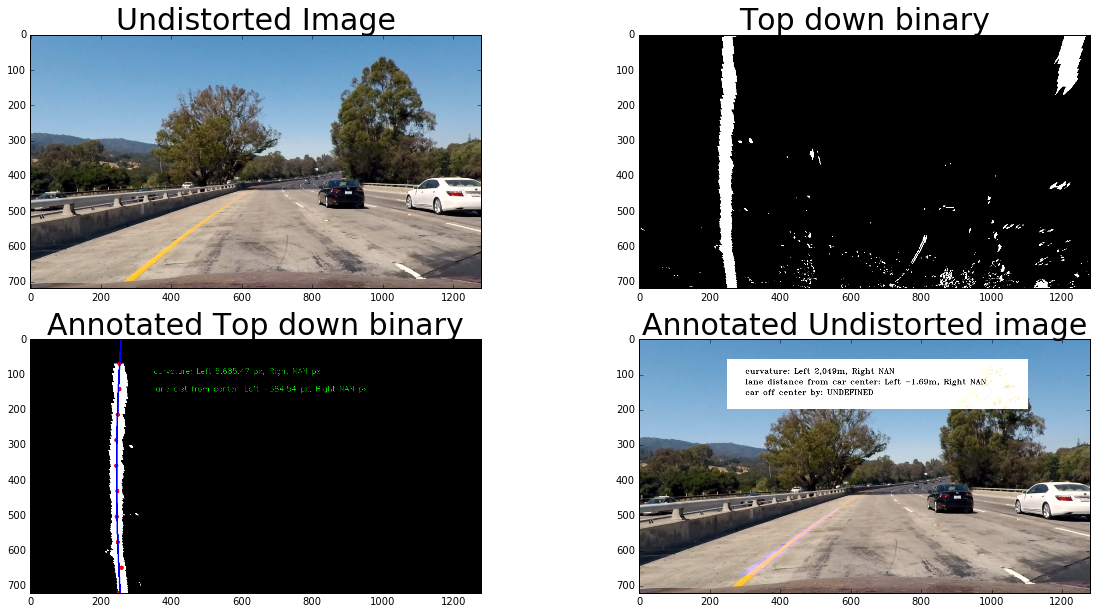

In [269]:
image = mpimg.imread('test_images/test1.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

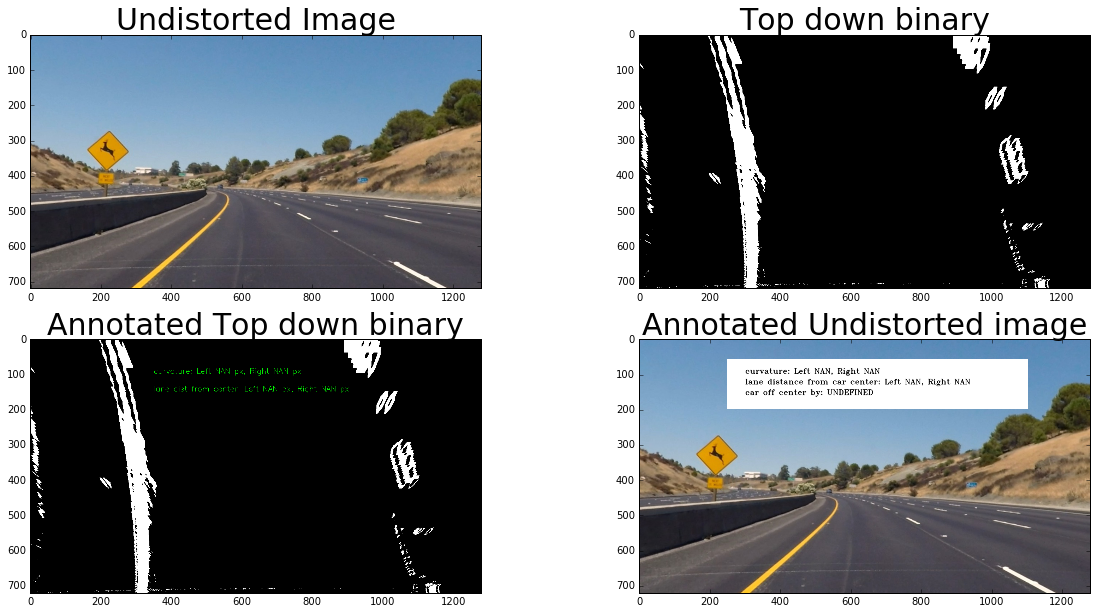

In [237]:
image = mpimg.imread('test_images/test2.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

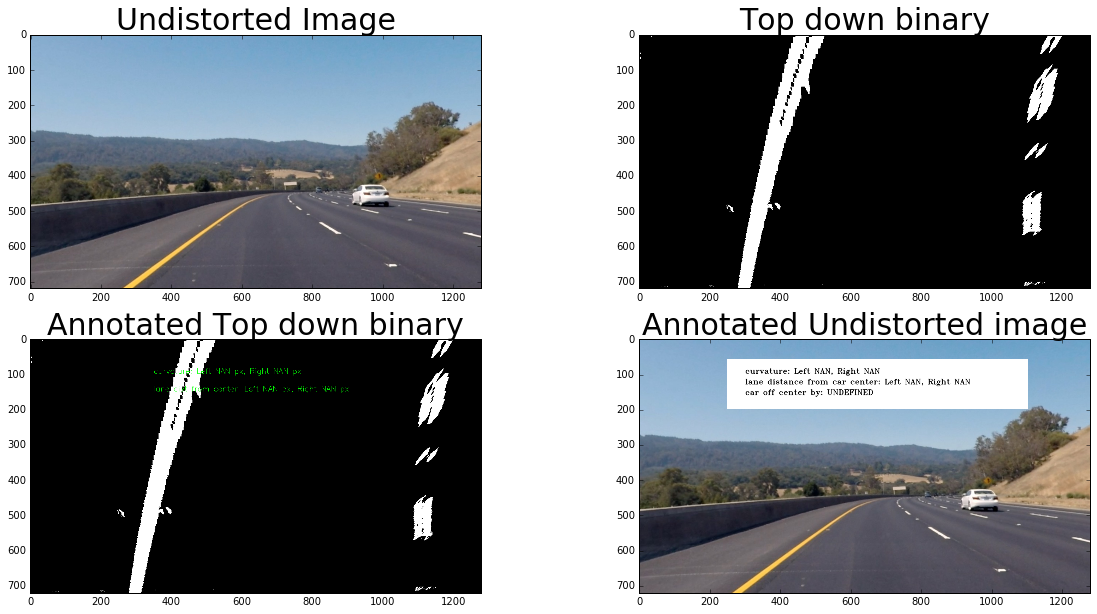

In [238]:
image = mpimg.imread('test_images/test3.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

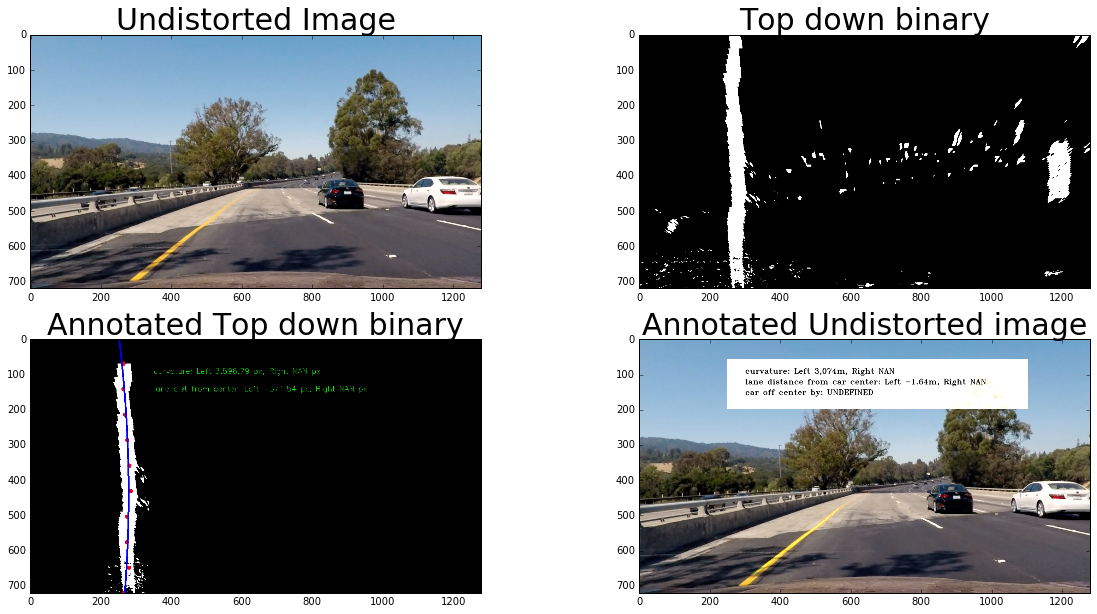

In [239]:
image = mpimg.imread('test_images/test4.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

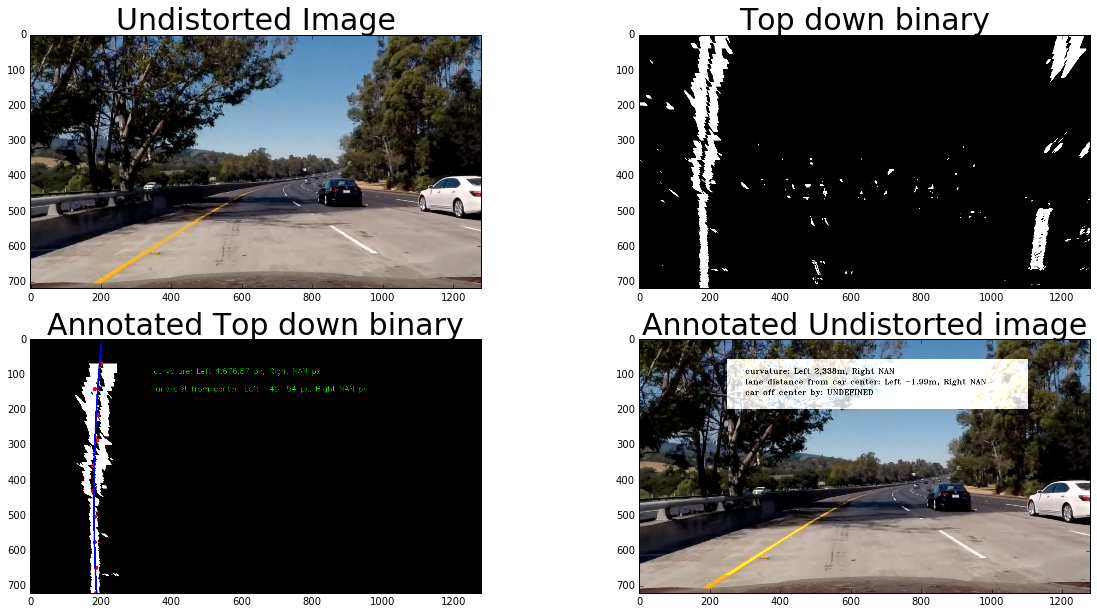

In [240]:
image = mpimg.imread('test_images/test5.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

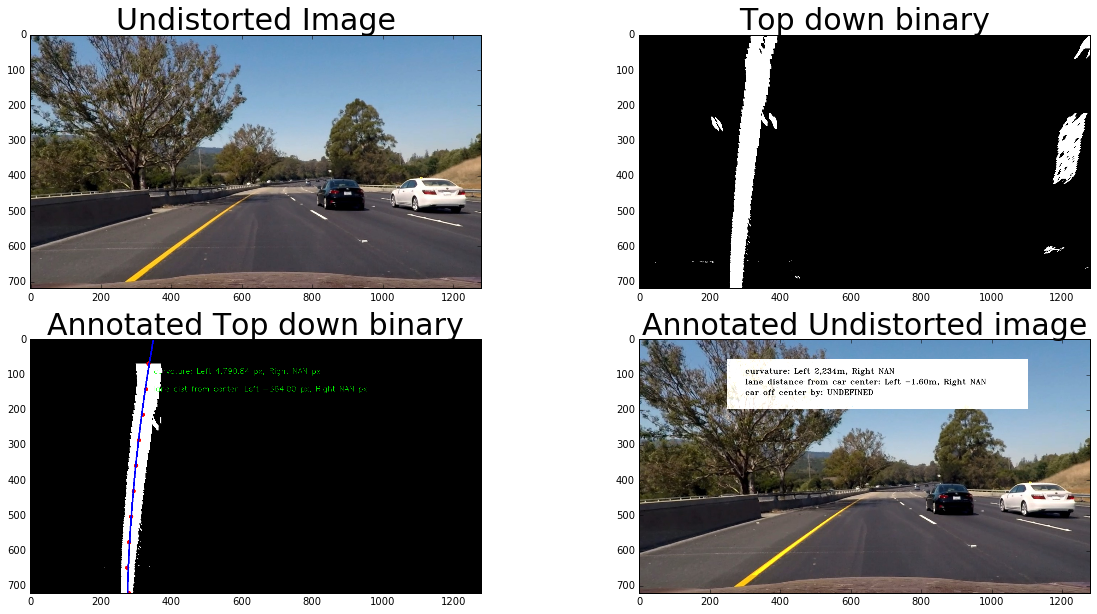

In [241]:
image = mpimg.imread('test_images/test6.jpg')

detector.process_image(image)

# Visualize
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10));
ax1.imshow(detector._undistorted_image);
ax1.set_title('Undistorted Image', fontsize=30);
ax2.imshow(detector._top_down_binary_image, cmap='gray');
ax2.set_title('Top down binary', fontsize=30);
ax3.imshow(detector._top_down_binary_with_lines_image);
ax3.set_title('Annotated Top down binary', fontsize=30);
ax4.imshow(detector._original_annotated_image);
ax4.set_title('Annotated Undistorted image', fontsize=30);

In [ ]:
# Once you have implemented a successful pipeline on the test images,
# you will run your algorithm on a video. 
# In the case of the video, you must search for the lane lines in the first few frames, and, 
# once you have a high-confidence detection, 
# use that information to track the position and curvature of the lines from frame to frame.

In [227]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [270]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])
input_clip = VideoFileClip("project_video.mp4")
annotated_output = 'project_video_annotated.mp4'

In [ ]:
annotated_clip = input_clip.fl_image(detector.process_image) #NOTE: this function expects color images!!
%time annotated_clip.write_videofile(annotated_output, audio=False)

[MoviePy] >>>> Building video project_video_annotated.mp4
[MoviePy] Writing video project_video_annotated.mp4


  2%|▏         | 31/1261 [00:07<04:47,  4.27it/s]

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(annotated_output))

In [ ]:
input_clip = VideoFileClip("challenge_video.mp4")
annotated_output = 'challenge_video_annotated.mp4'

In [ ]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])
annotated_clip = input_clip.fl_image(detector.process_image) #NOTE: this function expects color images!!
%time annotated_clip.write_videofile(annotated_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(annotated_output))

In [ ]:
input_clip = VideoFileClip("harder_challenge_video.mp4")
annotated_output = 'harder_challenge_video_annotated.mp4'

In [ ]:
detector = LaneDetector(dist_pickle['mtx'], dist_pickle['dist'])
annotated_clip = input_clip.fl_image(detector.process_image) #NOTE: this function expects color images!!
%time annotated_clip.write_videofile(annotated_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(annotated_output))